In [1]:
%matplotlib inline

import cv2
import yaml

from improcessing import *
from rfextraction import *

# Read image and load base params

In [2]:
image = scale_image(cv2.imreadmulti('source_images/Control.tif', flags=cv2.IMREAD_GRAYSCALE)[1][70])

with open('params_gray_mask.yml', 'r') as f:
    param_file = yaml.load(f, Loader=yaml.FullLoader)
    mode = param_file['mode']
    base_params = param_file['params']

display(base_params)

{'invert_image': True,
 'denoise_pre': 3,
 'contrast': 100,
 'offset': -12,
 'preserve_background': False,
 'manual_threshold': 1,
 'canny_unmasking': [130, 180],
 'closure_ks': 2,
 'border_removal': 1,
 'size_thresh': 30}

# Sweep through search range

-22


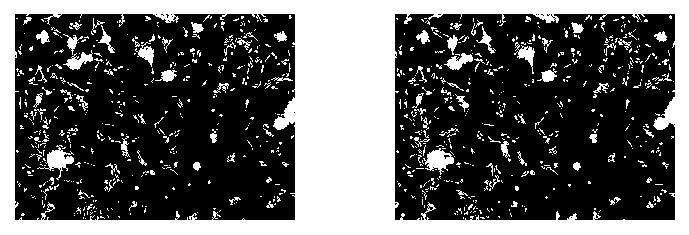

-21


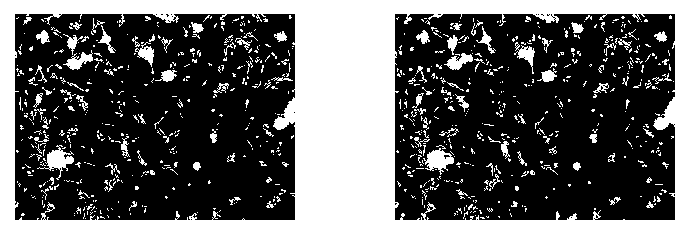

-20


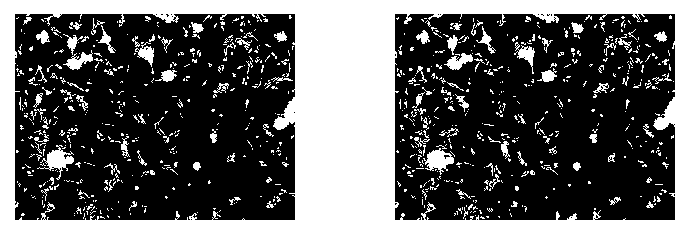

-19


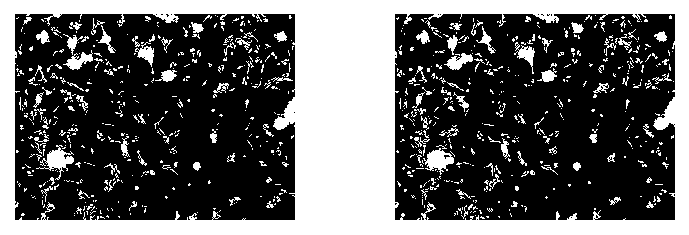

-18


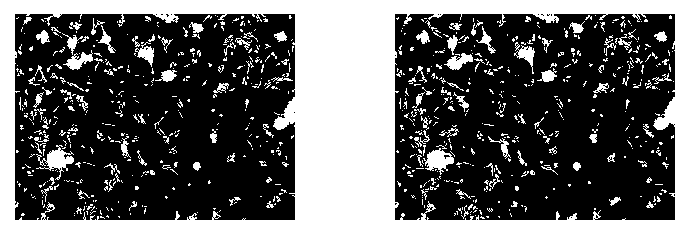

-17


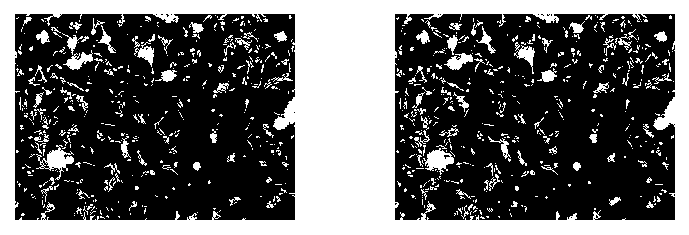

-16


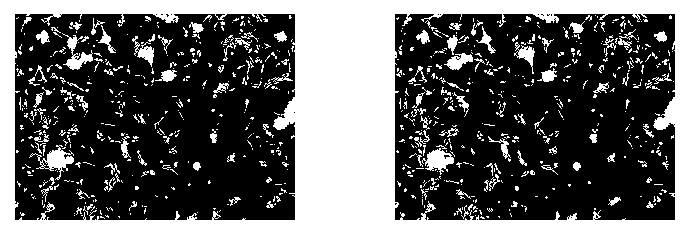

-15


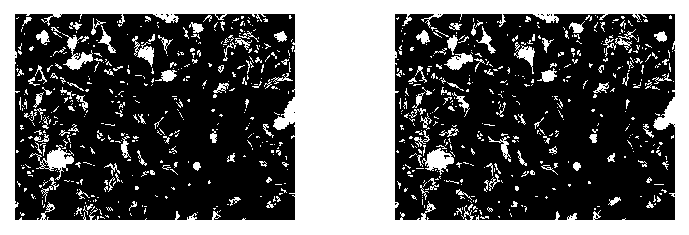

-14


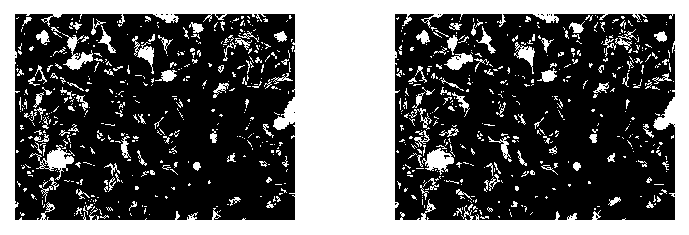

-13


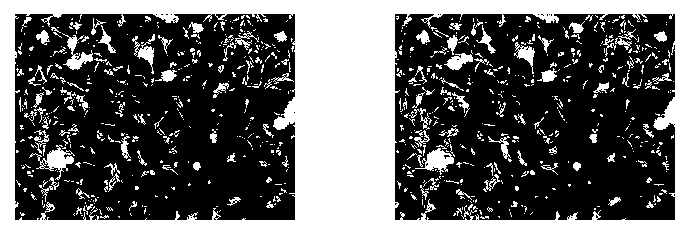

-12


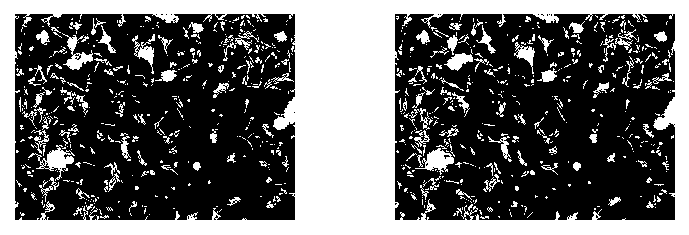

-11


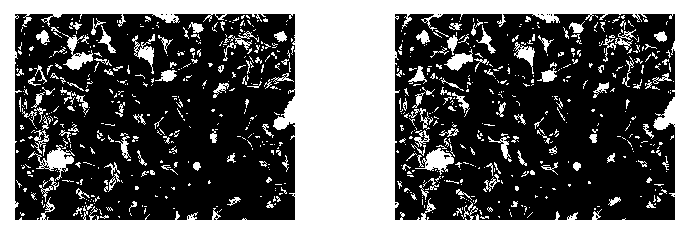

-10


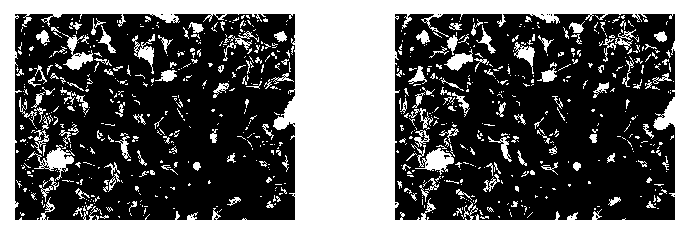

-9


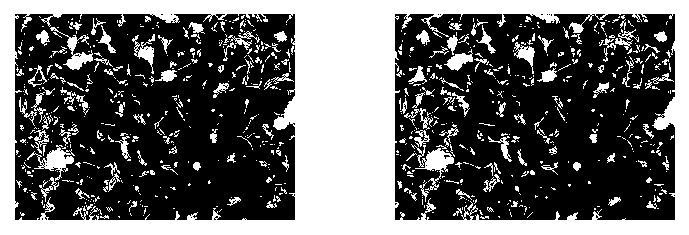

-8


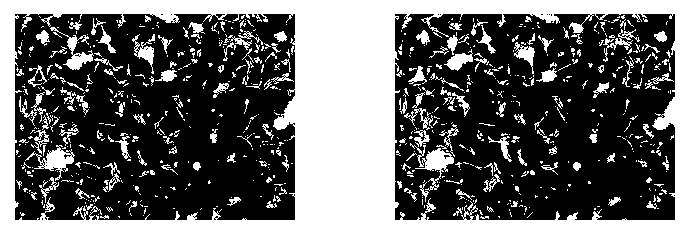

-7


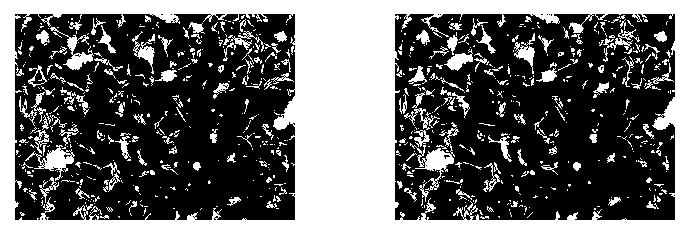

-6


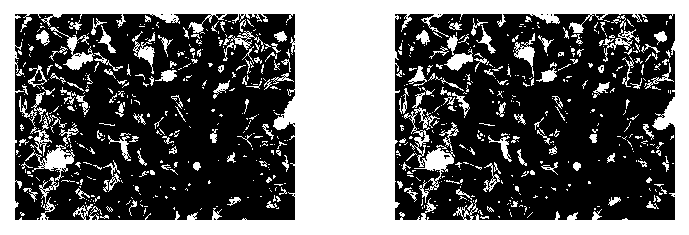

-5


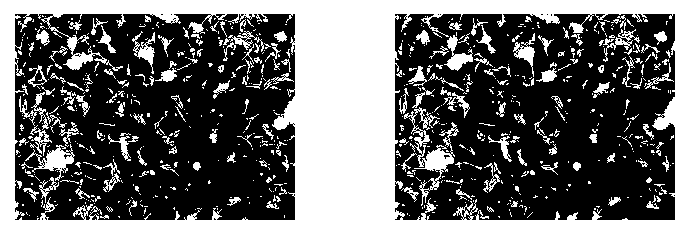

-4


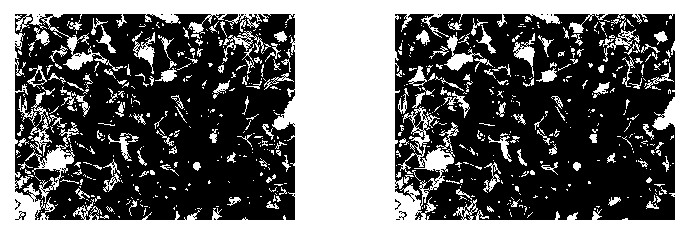

-3


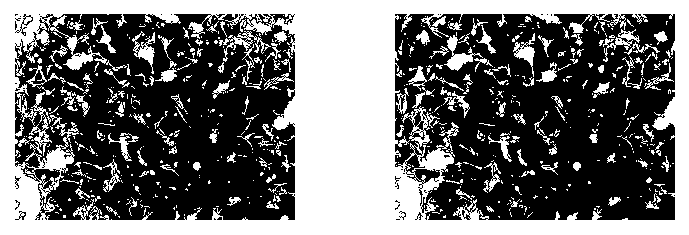

-2


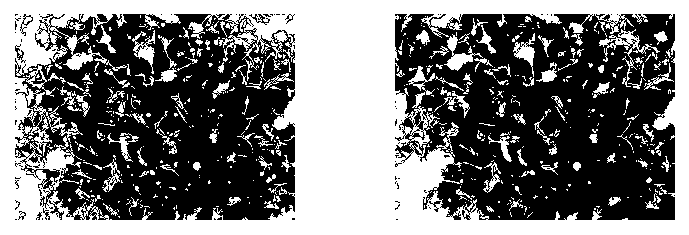

-1


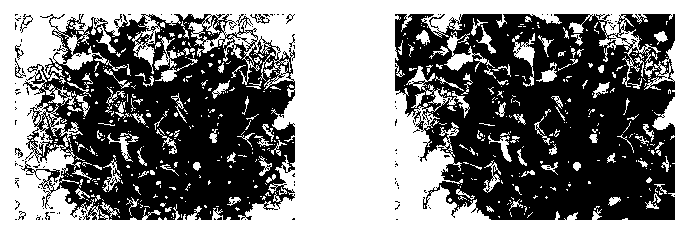

0


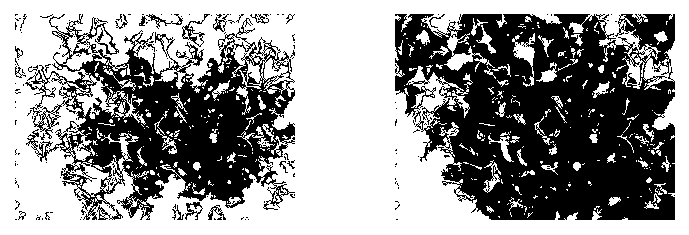

1


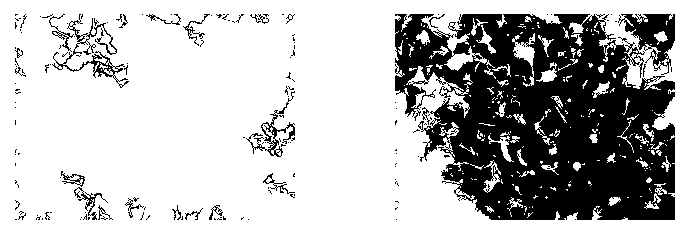

2


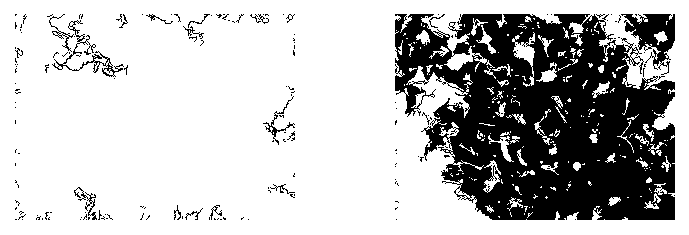

3


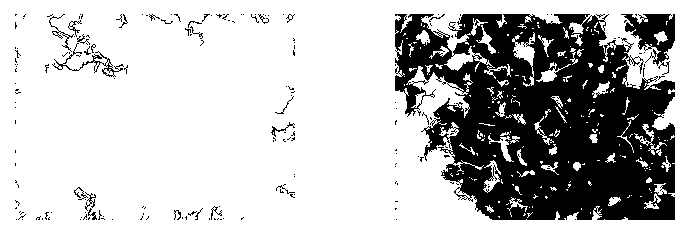

In [3]:
search_range = range(base_params['offset']-10, base_params['offset']+16)

num_components = []
total_area = []
for offset in search_range:
    params = base_params.copy()
    params['offset'] = offset

    mask_image_2 = get_mask_image(image, {'mode': mode, 'params': params})
    num_components += [get_num_components(mask_image_2),]

    del params['canny_unmasking']
    del params['closure_ks']
    mask_image_1 = get_mask_image(image, {'mode': mode, 'params': params})
    total_area += [np.sum((mask_image_1 != 0).astype(int)),]

    print(offset)
    display_image_array([mask_image_1, mask_image_2], columns=2, dpi=150)

# Plot trends

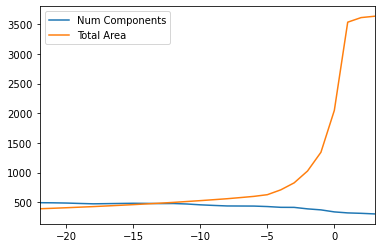

In [4]:
plt.plot(search_range, num_components, label="Num Components")
# 250 is arbitrary factor just to put everything on a similar scale
plt.plot(search_range, np.array(total_area)/250, label="Total Area")
plt.xlim([search_range[0], search_range[-1]])
plt.legend()
plt.show()

# Select final param using derivatives

In [5]:
offset = search_range[np.where(np.diff(total_area) > 10000)[0][0]]
print("Selected offset: %i" % offset)

Selected offset: -5
